In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
df=pd.read_csv('/content/StudentsPerformance.csv')

In [29]:
df.shape

(1000, 8)

In [30]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
521,female,group C,associate's degree,standard,none,91,86,84
475,female,group D,bachelor's degree,standard,completed,71,76,83
830,female,group A,some college,free/reduced,none,61,60,57
168,female,group B,high school,standard,completed,68,83,78
5,female,group B,associate's degree,standard,none,71,83,78


In [31]:
def assign_gender(df):
    df.loc[df['gender'] == 'female', 'gender'] = 'F'
    df.loc[df['gender'] != 'F', 'gender'] = 'M'
    return df


In [32]:
df=assign_gender(df)

In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,F,group B,bachelor's degree,standard,none,72,72,74
1,F,group C,some college,standard,completed,69,90,88
2,F,group B,master's degree,standard,none,90,95,93
3,M,group A,associate's degree,free/reduced,none,47,57,44
4,M,group C,some college,standard,none,76,78,75


In [34]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [35]:
df['race/ethnicity'] = df['race/ethnicity'].replace({
    'group A': 'A',
    'group B': 'B',
    'group C': 'C',
    'group D': 'D',
    'group E': 'E'
})

In [36]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,F,B,bachelor's degree,standard,none,72,72,74
1,F,C,some college,standard,completed,69,90,88
2,F,B,master's degree,standard,none,90,95,93
3,M,A,associate's degree,free/reduced,none,47,57,44
4,M,C,some college,standard,none,76,78,75


In [37]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [38]:
df['test preparation course'] = df['test preparation course'].replace('none', np.nan)

In [39]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,F,B,bachelor's degree,standard,NaN,72,72,74
1,F,C,some college,standard,completed,69,90,88
2,F,B,master's degree,standard,NaN,90,95,93
3,M,A,associate's degree,free/reduced,NaN,47,57,44
4,M,C,some college,standard,NaN,76,78,75


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      358 non-null    object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [41]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [42]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,642
math score,0
reading score,0
writing score,0


In [43]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [44]:
df.duplicated().sum()

np.int64(0)

In [45]:
df.corr(numeric_only=True)

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


from matplotlib import pyplot as plt
_df_0['math score'].plot(kind='hist', bins=20, title='math score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['reading score'].plot(kind='hist', bins=20, title='reading score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['writing score'].plot(kind='hist', bins=20, title='writing score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='math score', y='reading score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='reading score', y='writing score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['writing score']
  ys = series['math score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('writing score', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('writing score')
_ = plt.ylabel('math score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['writing score']
  ys = series['reading score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('writing score', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('writing score')
_ = plt.ylabel('reading score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['writing score']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'writing score'}, axis=1)
              .sort_values('writing score', ascending=True))
  xs = counted['writing score']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('writing score', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('writing score')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['math score'].plot(kind='line', figsize=(8, 4), title='math score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['reading score'].plot(kind='line', figsize=(8, 4), title='reading score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['writing score'].plot(kind='line', figsize=(8, 4), title='writing score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [46]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,F,B,bachelor's degree,standard,NaN,72,72,74


In [47]:
df.shape

(1000, 8)

<Axes: xlabel='gender', ylabel='count'>

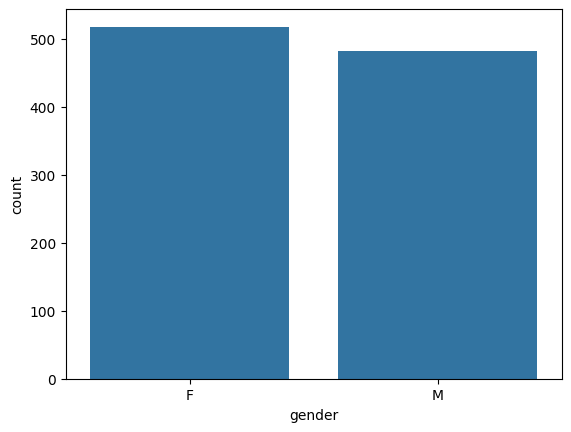

In [50]:
sns.countplot(x='gender',data=df)


<Axes: ylabel='count'>

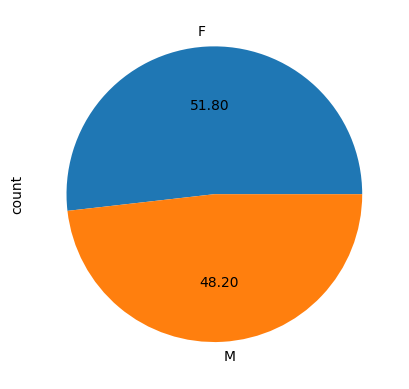

In [51]:
df['gender'].value_counts().plot(kind='pie',autopct='%.2f')

In [52]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<Axes: xlabel='race/ethnicity', ylabel='count'>

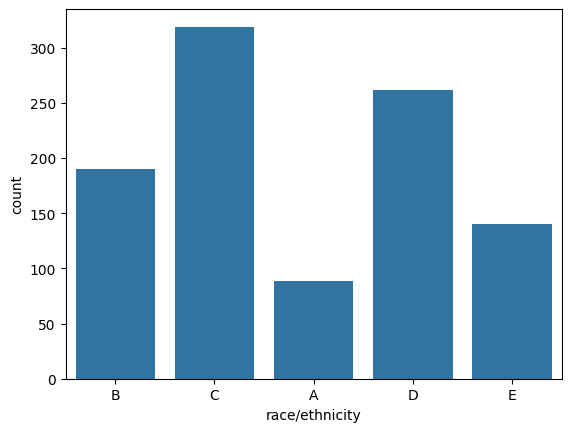

In [53]:
sns.countplot(x='race/ethnicity',data=df)

<Axes: ylabel='count'>

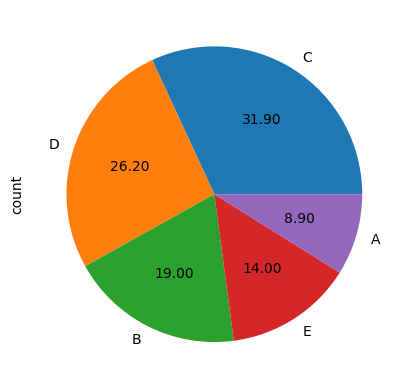

In [54]:
df['race/ethnicity'].value_counts().plot(kind='pie',autopct='%.2f')

In [55]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,F,B,bachelor's degree,standard,NaN,72,72,74


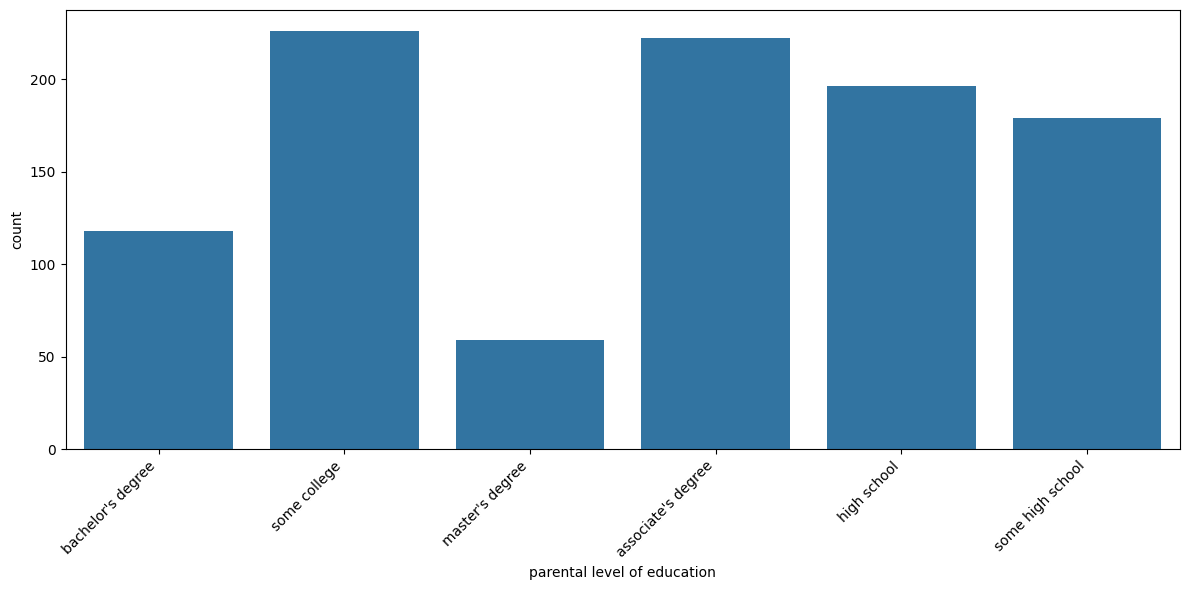

In [60]:
plt.figure(figsize=(12, 6))
sns.countplot(x='parental level of education', data=df)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

<Axes: ylabel='count'>

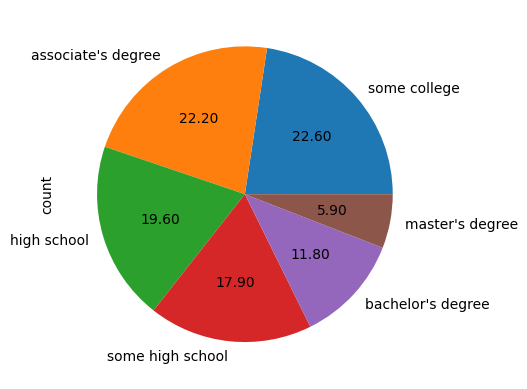

In [61]:
df['parental level of education'].value_counts().plot(kind='pie',autopct='%.2f')

In [62]:
df['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [64]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<Axes: xlabel='test preparation course', ylabel='count'>

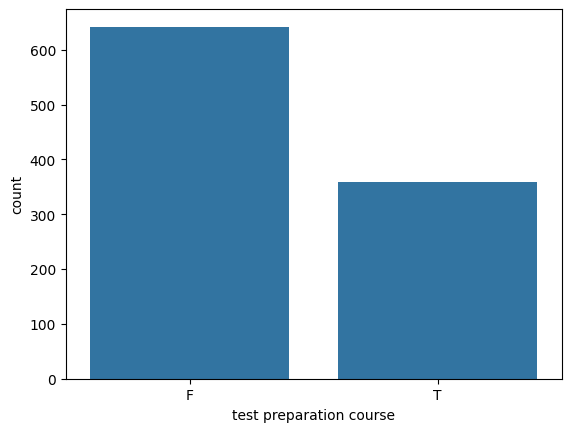

In [71]:
sns.countplot(x="test preparation course",data=df)

In [66]:
df['test preparation course'] = df['test preparation course'].replace(np.nan, 'F')


In [67]:
df['test preparation course']=df['test preparation course'].replace({
    'completed' : 'T'
})

In [69]:
df['test preparation course']

,test preparation course
0,F
1,T
2,F
3,F
4,F
...,...
995,T
996,F
997,T
998,T


In [70]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<Axes: ylabel='count'>

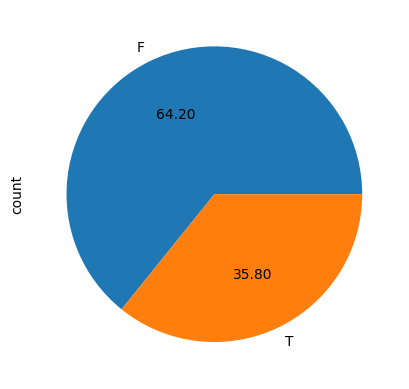

In [73]:
df['test preparation course'].value_counts().plot(kind='pie',autopct='%.2f')

In [75]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

(array([  2.,   2.,  10.,  26.,  95., 188., 268., 216., 135.,  58.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

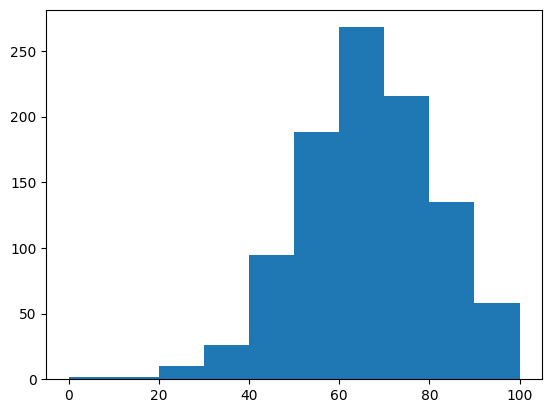

In [79]:
plt.hist(x='math score',data=df)

In [80]:
df['math score'].min()

0

In [81]:
df['math score'].max()

100

In [82]:
df['math score'].mean()

np.float64(66.089)

In [83]:
df['math score'].skew()

np.float64(-0.27893514909431694)

/tmp/ipython-input-84-2354272343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'])


<Axes: xlabel='math score', ylabel='Density'>

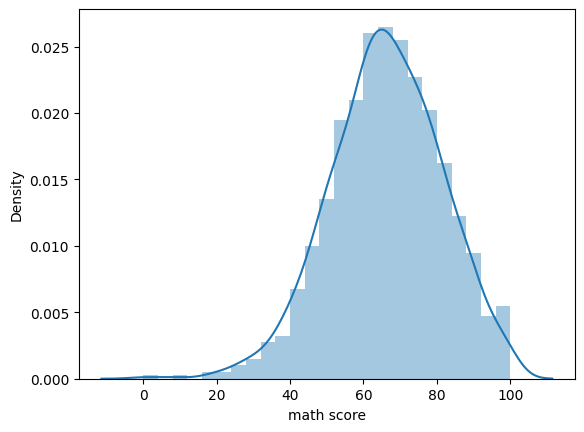

In [84]:
sns.distplot(df['math score'])

<Axes: xlabel='math score'>

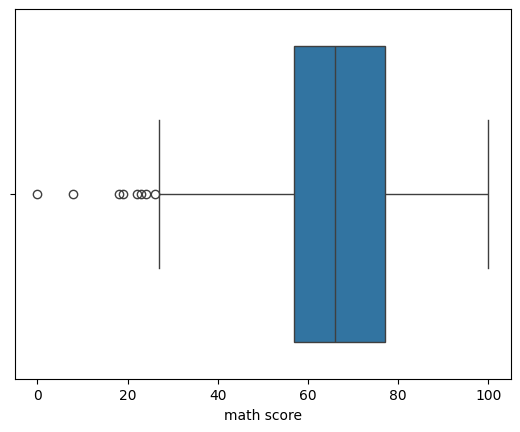

In [86]:
sns.boxplot(x='math score',data=df)

In [87]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

(array([  4.,   7.,  22.,  64., 140., 182., 237., 168., 120.,  56.]),
 array([ 17. ,  25.3,  33.6,  41.9,  50.2,  58.5,  66.8,  75.1,  83.4,
         91.7, 100. ]),
 <BarContainer object of 10 artists>)

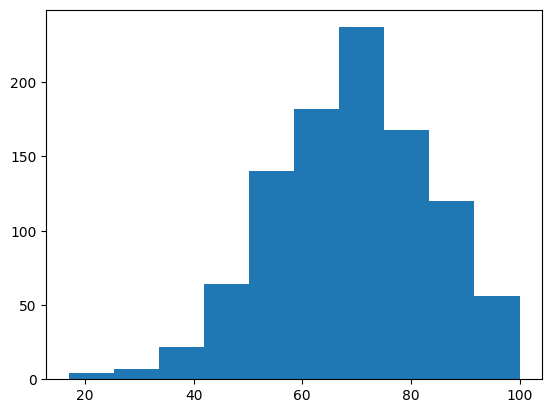

In [88]:
plt.hist(x='reading score',data=df)

In [89]:
print('Min Reading Score : ',df['reading score'].min())
print('Max Reading Score : ',df['reading score'].max())
print('Mean Reading Score : ',df['reading score'].mean())

Min Reading Score :  17
Max Reading Score :  100
Mean Reading Score :  69.169


/tmp/ipython-input-91-232294105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading score'])


<Axes: xlabel='reading score', ylabel='Density'>

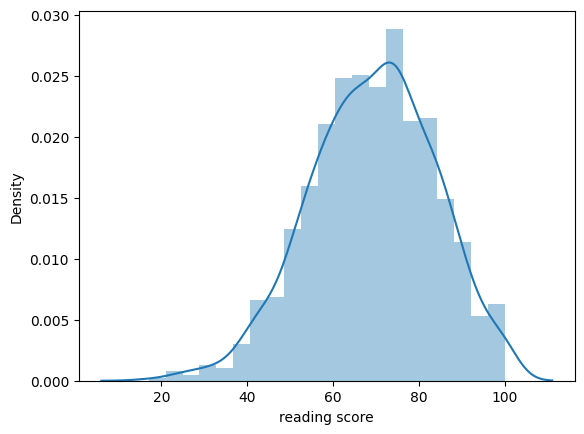

In [91]:
sns.distplot(df['reading score'])

<Axes: xlabel='reading score'>

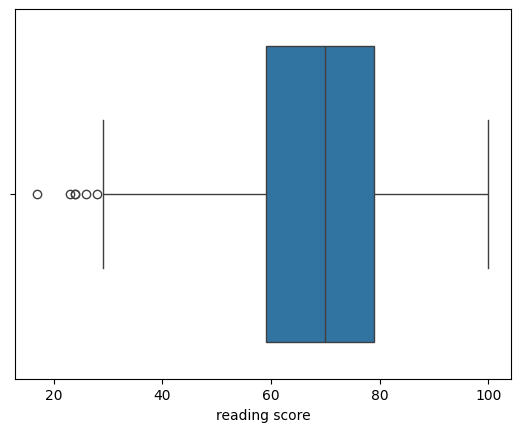

In [92]:
sns.boxplot(x='reading score',data=df)

In [93]:
df['reading score'].skew()

np.float64(-0.25910451810923063)

In [94]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

(array([  2.,   6.,  14.,  55., 126., 161., 223., 225., 120.,  68.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

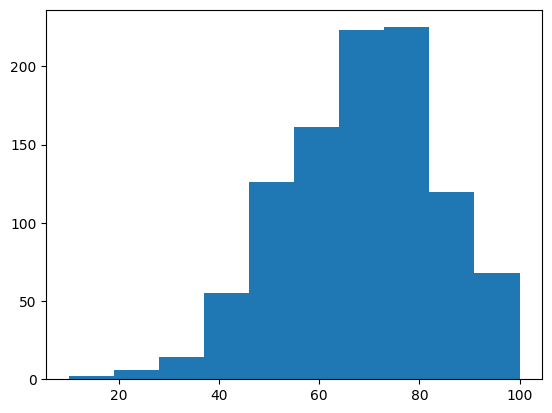

In [95]:
plt.hist(x='writing score',data=df)

In [96]:
print('Min Writing Score : ',df['writing score'].min())
print('Max Writing Score : ',df['writing score'].max())
print('Mean Writing Score : ',df['writing score'].mean())

Min Writing Score :  10
Max Writing Score :  100
Mean Writing Score :  68.054


/tmp/ipython-input-97-668233639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['writing score'])


<Axes: xlabel='writing score', ylabel='Density'>

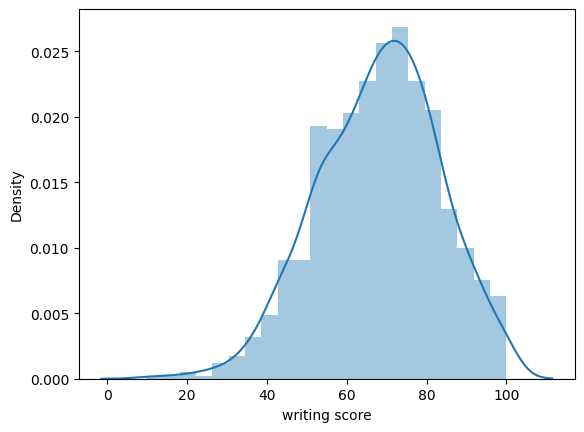

In [97]:
sns.distplot(df['writing score'])

In [98]:
df['writing score'].skew()

np.float64(-0.28944397150761897)

<Axes: xlabel='writing score'>

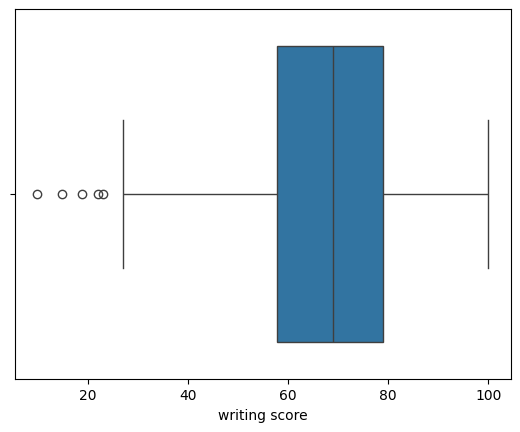

In [99]:
sns.boxplot(x='writing score',data=df)